In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 1.  Exploratory data analysis

In [2]:
customer = pd.read_csv("QVI_purchase_behaviour.csv")
customer.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [3]:
transaction = pd.read_excel("QVI_transaction_data.xlsx")
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### 1.1 Examine Transaction Data

In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [6]:
# We can see that the date column is in an integer format. Let's change this to a date format.
base_time = pd.Timestamp('1899-12-30')
transaction["DATE"] = base_time+ + pd.to_timedelta(transaction.DATE, unit='d')
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
# Check product name
transaction['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [8]:
# check product names are not with Chips:
transaction = transaction[~transaction['PROD_NAME'].str.contains("Chip")]
transaction["PROD_NAME"].unique()

array(['CCs Nacho Cheese    175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Grain Waves         Sweet Chilli 210g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'CCs Original 175g', 'Burger Rings 220g',
       'NCC Sour Cream &    Garden Chives 175g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g', 'Kettle Original 175g',
       'Red Rock Deli Thai  Chilli&Lime 150g',
       'Pringles Sthrn FriedChicken 134g', 'Pringles Sweet&Spcy BBQ 134g',
       'Red Rock Deli SR    Salsa & Mzzrlla 150g',
       'Red Rock Deli Sp    Salt & Truffle 150G',
       'Smiths Thinly       Swt Chli&S/Cream175G', 'Kettle Chilli 175g',
       'Doritos Mexicana    170g',
       'Smiths Crinkle Cut 

In [9]:
# remove digits and special characters
transaction['PROD_NAME']=transaction['PROD_NAME'].str.replace(r'[@#&$%+-/*]',"")
# transaction['PROD_NAME']=transaction['PROD_NAME'].str.replace(r'[0-9]+g',"")

In [10]:
# distinct words by frequency of occurence
transaction["PROD_NAME"].value_counts()

Kettle Mozzarella   Basil  Pesto 175g      3304
Kettle Tortilla ChpsHnyJlpno Chili 150g    3296
Tyrrells Crisps     Ched  Chives 165g      3268
Kettle 135g Swt Pot Sea Salt               3257
Tostitos Splash Of  Lime 175g              3252
                                           ... 
Sunbites Whlegrn    Crisps FrchOnin 90g    1432
RRD Pc Sea Salt     165g                   1431
Woolworths Medium   Salsa 300g             1430
NCC Sour Cream     Garden Chives 175g      1419
WW Crinkle Cut      Original 175g          1410
Name: PROD_NAME, Length: 81, dtype: int64

In [11]:
# remove values that producat name contains "Salsa"
transaction_chips=transaction[~transaction.PROD_NAME.str.contains("Salsa")]
transaction_chips.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili 150g,3,13.8
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
9,2018-08-18,7,7150,6900,52,Grain Waves Sour CreamChives 210G,2,7.2
11,2018-08-20,8,8294,8221,114,Kettle Sensations Siracha Lime 150g,5,23.0


In [12]:
print(transaction_chips.info())
transaction_chips.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172172 entries, 1 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            172172 non-null  datetime64[ns]
 1   STORE_NBR       172172 non-null  int64         
 2   LYLTY_CARD_NBR  172172 non-null  int64         
 3   TXN_ID          172172 non-null  int64         
 4   PROD_NBR        172172 non-null  int64         
 5   PROD_NAME       172172 non-null  object        
 6   PROD_QTY        172172 non-null  int64         
 7   TOT_SALES       172172 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 11.8+ MB
None


,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,172172.000000,1.721720e+05,1.721720e+05,172172.000000,172172.000000,172172.000000
mean,134.875015,1.353671e+05,1.349568e+05,58.820859,1.909707,7.520906
std,76.801388,8.091418e+04,7.822812e+04,33.781881,0.756823,3.352390
min,1.000000,1.002000e+03,2.000000e+00,3.000000,1.000000,1.700000
25%,69.000000,6.923000e+04,6.729475e+04,26.000000,2.000000,5.400000
50%,130.000000,1.303325e+05,1.350435e+05,58.000000,2.000000,7.400000
75%,203.000000,2.030310e+05,2.024002e+05,88.000000,2.000000,9.200000
max,272.000000,2.370961e+06,2.415841e+06,114.000000,200.000000,650.000000


There are no null values, but product quantity appears to have an outlier which we should investigate further. Let's investigate further the case where 200 packates of chips are bought in one transaction. 

In [13]:
transaction_chips[transaction_chips['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


looks like there 2 transactions with 200 quantity in a single transact, and they are both from the same loyalty card number (same customer) on different date. Let's check if the customer has other purchase record as well. 

In [14]:
transaction_chips[transaction_chips['LYLTY_CARD_NBR']==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


looks like this customer only has these 2 transaction records. The customer might be buying chips for commercial purposes instead. We'll remove this loyalty card number from further analysis. 

In [15]:
# Remove the customer with loyalty card number: 226000
transaction_chips.drop(transaction_chips.loc[transaction_chips['LYLTY_CARD_NBR']==226000].index, inplace=True)
transaction_chips[transaction_chips['LYLTY_CARD_NBR']==226000]

C:\Users\ACI\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [16]:
print(transaction_chips.info())
transaction_chips.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172170 entries, 1 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            172170 non-null  datetime64[ns]
 1   STORE_NBR       172170 non-null  int64         
 2   LYLTY_CARD_NBR  172170 non-null  int64         
 3   TXN_ID          172170 non-null  int64         
 4   PROD_NBR        172170 non-null  int64         
 5   PROD_NAME       172170 non-null  object        
 6   PROD_QTY        172170 non-null  int64         
 7   TOT_SALES       172170 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 11.8+ MB
None


,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,172170.000000,1.721700e+05,1.721700e+05,172170.000000,172170.000000,172170.000000
mean,134.873956,1.353660e+05,1.349557e+05,58.821496,1.907405,7.513443
std,76.801206,8.091406e+04,7.822796e+04,33.781560,0.341985,2.538413
min,1.000000,1.002000e+03,2.000000e+00,3.000000,1.000000,1.700000
25%,69.000000,6.923000e+04,6.729425e+04,26.000000,2.000000,5.400000
50%,130.000000,1.303320e+05,1.350425e+05,58.000000,2.000000,7.400000
75%,203.000000,2.030300e+05,2.023985e+05,88.000000,2.000000,9.200000
max,272.000000,2.370961e+06,2.415841e+06,114.000000,5.000000,28.500000


In [17]:
# count the number of transactions by date
transaction_chips['DATE'].value_counts()

2018-12-22    593
2018-12-23    588
2018-12-19    582
2018-12-24    580
2018-12-20    576
             ... 
2018-07-10    416
2019-06-24    413
2018-09-22    413
2019-06-18    408
2019-01-24    407
Name: DATE, Length: 364, dtype: int64

There are 364 rows, meaning only 364 dates which indicates a missing date. let's create a sequence of dates from 7/1/2018 to 6/30/2019 and use this to create a chart of number of transactions over time to find the missing date. 

In [18]:
date_df = transaction_chips.set_index("DATE")
print(pd.date_range(start="2018-07-01", end = "2019-06-30").difference(date_df.index))

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)


In [51]:
total_sales = pd.DataFrame(transaction_chips.groupby(transaction_chips['DATE'])['TOT_SALES'].sum()).reset_index()

In [65]:
dates = pd.Series(pd.date_range(start=total_sales["DATE"].min(), end=total_sales["DATE"].max()), name="DATE")
check_null_date = pd.merge(dates, total_sales, on='DATE', how = 'left')
check_null_date.fillna(0,inplace=True) # fill missing date total sales value with 0
check_null_date[(check_null_date['DATE']>="2018-12-01")&(check_null_date['DATE']<="2019-01-01")]

,DATE,TOT_SALES
153,2018-12-01,3493.0
154,2018-12-02,3398.0
155,2018-12-03,3571.9
156,2018-12-04,3526.0
157,2018-12-05,3543.2
158,2018-12-06,3451.3
159,2018-12-07,3536.9
160,2018-12-08,3274.7
161,2018-12-09,3497.1
162,2018-12-10,3615.5


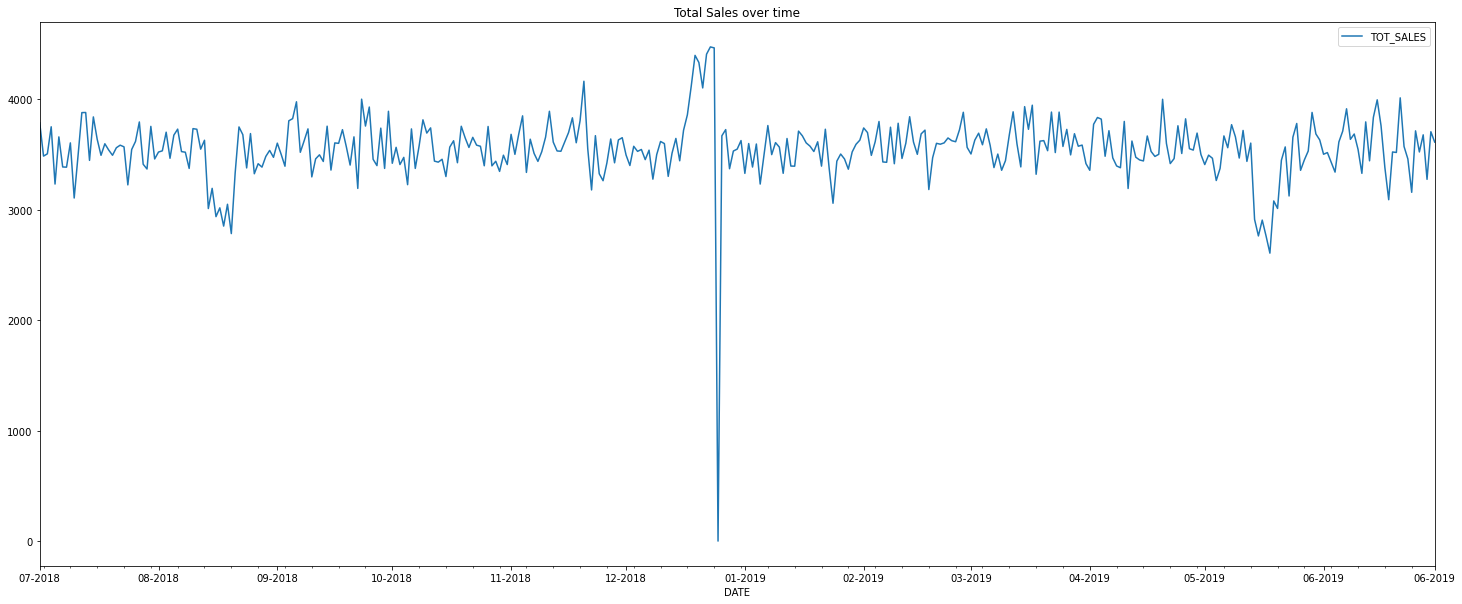

In [56]:
from matplotlib import dates
# plot the total sales
ax = check_null_date.plot.line(x='DATE',y = 'TOT_SALES',figsize=(25, 10))
ax.xaxis.set_major_formatter(dates.DateFormatter("%m-%Y")) #change the date display format
plt.title("Total Sales over time")
plt.show()

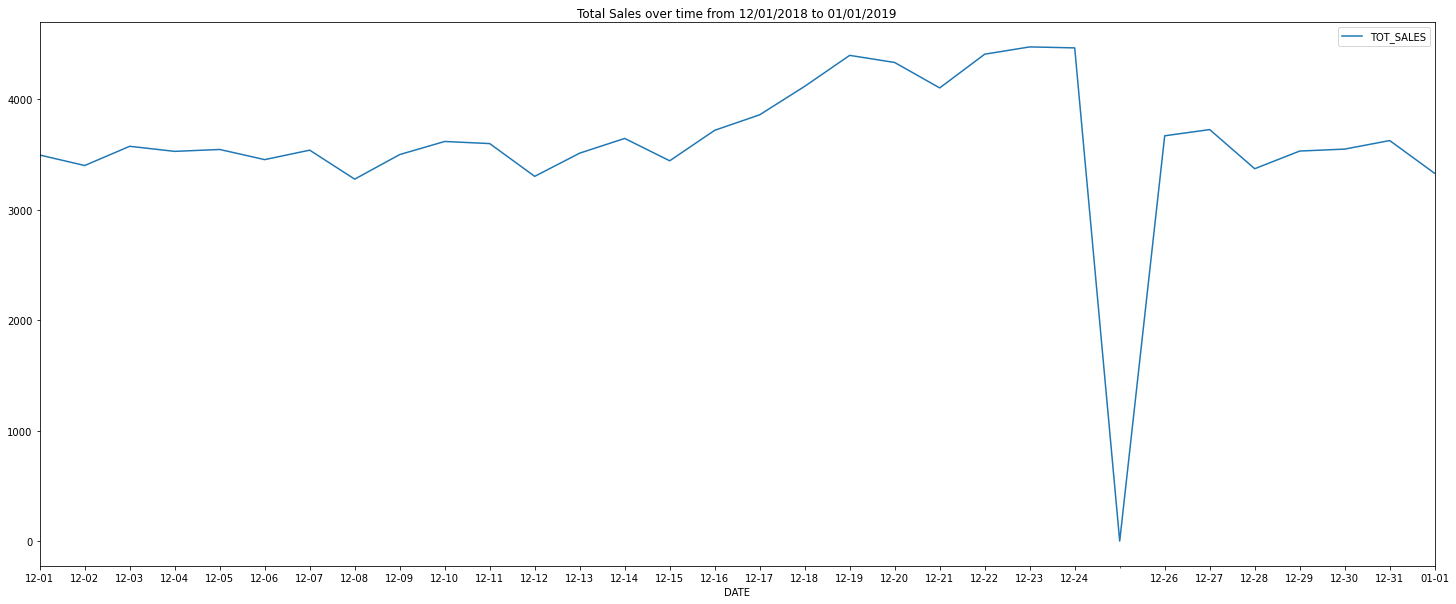

In [61]:
ax = check_null_date.plot.line(x='DATE',y = 'TOT_SALES',figsize=(25, 10))
ax.set(xticks=total_sales.DATE.values) # show all dates
ax.xaxis.set_major_formatter(dates.DateFormatter("%m-%d")) #change the date display format
plt.xlim("2018-12-01", "2019-01-01")
plt.title("Total Sales over time from 12/01/2018 to 01/01/2019")
plt.show()


from the plot above, we can tell that the increase in sales occurs in the lead-up to Christmas. the missing date is on Christmas date: 2018-12-25, since shops being closed on Christmas day.

In [28]:
# Extract the number (pack size) in the prod_name, and make it a new column
transaction_chips["PACK_SIZE"] = transaction_chips.PROD_NAME.str.extract('(\d+)')
transaction_chips.head()

<ipython-input-28-11460189e12f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_chips["PACK_SIZE"] = transaction_chips.PROD_NAME.str.extract('(\d+)')


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili 150g,3,13.8,150
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,210
9,2018-08-18,7,7150,6900,52,Grain Waves Sour CreamChives 210G,2,7.2,210
11,2018-08-20,8,8294,8221,114,Kettle Sensations Siracha Lime 150g,5,23.0,150


In [31]:
# Extract the brand name from prod name (extract the first word)
transaction_chips["BRAND_NAME"] = transaction_chips['PROD_NAME'].str.split(' ').str[0]
transaction_chips.head()

<ipython-input-31-bb96fb9c3a0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_chips["BRAND_NAME"] = transaction_chips['PROD_NAME'].str.split(' ').str[0]


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili 150g,3,13.8,150,Kettle
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,210,Grain
9,2018-08-18,7,7150,6900,52,Grain Waves Sour CreamChives 210G,2,7.2,210,Grain
11,2018-08-20,8,8294,8221,114,Kettle Sensations Siracha Lime 150g,5,23.0,150,Kettle


In [32]:
# list out all the brand names
transaction_chips["BRAND_NAME"].value_counts()

Kettle        41288
Pringles      25102
RRD           11894
Infuzions     11057
Smiths        10518
Twisties       9454
Tyrrells       6442
Tostitos       6326
Grain          6272
Doritos        6167
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
WW             2877
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
Name: BRAND_NAME, dtype: int64

In [34]:
# RRD and Red are the same brand, replace the typo RRD to Red
# Cheezels and Twisties are the same brand, replace cheezles to Twisties 
transaction_chips["BRAND_NAME"].replace({"RRD":"Red"; 'Cheezels':'Twisties'},inplace = True)
transaction_chips["BRAND_NAME"].value_counts()

Kettle        41288
Pringles      25102
Red           16321
Twisties      14057
Infuzions     11057
Smiths        10518
Tyrrells       6442
Tostitos       6326
Grain          6272
Doritos        6167
CCs            4551
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
WW             2877
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
Name: BRAND_NAME, dtype: int64

### 1.2 Examine Customer Data 

In [67]:
print(customer.info())
customer.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


### 1.3 Merge Customer Data and Transaction Data

In [68]:
# Take all the rows in Transaction data and find rows with matching values in shared columns and then 
# joining the details in these rows. 
combine = pd.merge(transaction_chips, customer, how="left", on= "LYLTY_CARD_NBR")
combine.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
1,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-18,7,7150,6900,52,Grain Waves Sour CreamChives 210G,2,7.2,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-20,8,8294,8221,114,Kettle Sensations Siracha Lime 150g,5,23.0,MIDAGE SINGLES/COUPLES,Budget


In [69]:
combine.info()
# there is no nulls. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172170 entries, 0 to 172169
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              172170 non-null  datetime64[ns]
 1   STORE_NBR         172170 non-null  int64         
 2   LYLTY_CARD_NBR    172170 non-null  int64         
 3   TXN_ID            172170 non-null  int64         
 4   PROD_NBR          172170 non-null  int64         
 5   PROD_NAME         172170 non-null  object        
 6   PROD_QTY          172170 non-null  int64         
 7   TOT_SALES         172170 non-null  float64       
 8   LIFESTAGE         172170 non-null  object        
 9   PREMIUM_CUSTOMER  172170 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 14.4+ MB


In [42]:
# Save the combine data to csv file for further task
combine.to_csv("combine.csv")

# 2. Data Analysis
1. Who spends the most on chips (total Sales),  describing customers by lifestage and how premium their general purchasing behaviour is
2. How many customers are in each segment
3. How many chips are bought per customer by segment
4. What is the average chip price by customer segment
5. The customer's total spend over the period and total spend for each transaction to understand what proportion of their grocery spend is on chips
6. Proportion of customers in each customer segment overall to compare against the mix of cusotmers who purchase chips

In [70]:
# Calculate total sales by LIFESTAGE and PREMIUM_CUSTOMER
life_premium=pd.DataFrame(combine.groupby([combine['LIFESTAGE'], combine['PREMIUM_CUSTOMER']])['TOT_SALES'].sum()).reset_index()
life_premium.sort_values(by=['TOT_SALES'],ascending=False)

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
6,OLDER FAMILIES,Budget,112004.55
19,YOUNG SINGLES/COUPLES,Mainstream,107512.30
13,RETIREES,Mainstream,104576.85
15,YOUNG FAMILIES,Budget,92653.85
9,OLDER SINGLES/COUPLES,Budget,91890.60
10,OLDER SINGLES/COUPLES,Mainstream,89205.30
11,OLDER SINGLES/COUPLES,Premium,88992.55
12,RETIREES,Budget,75864.50
7,OLDER FAMILIES,Mainstream,68115.05
14,RETIREES,Premium,66492.25


In [71]:
premium=pd.DataFrame(combine.groupby(combine['PREMIUM_CUSTOMER'])['TOT_SALES'].sum()).reset_index()
premium.sort_values(by=['TOT_SALES'],ascending=False)

,PREMIUM_CUSTOMER,TOT_SALES
1,Mainstream,502884.70
0,Budget,451221.95
2,Premium,339482.75


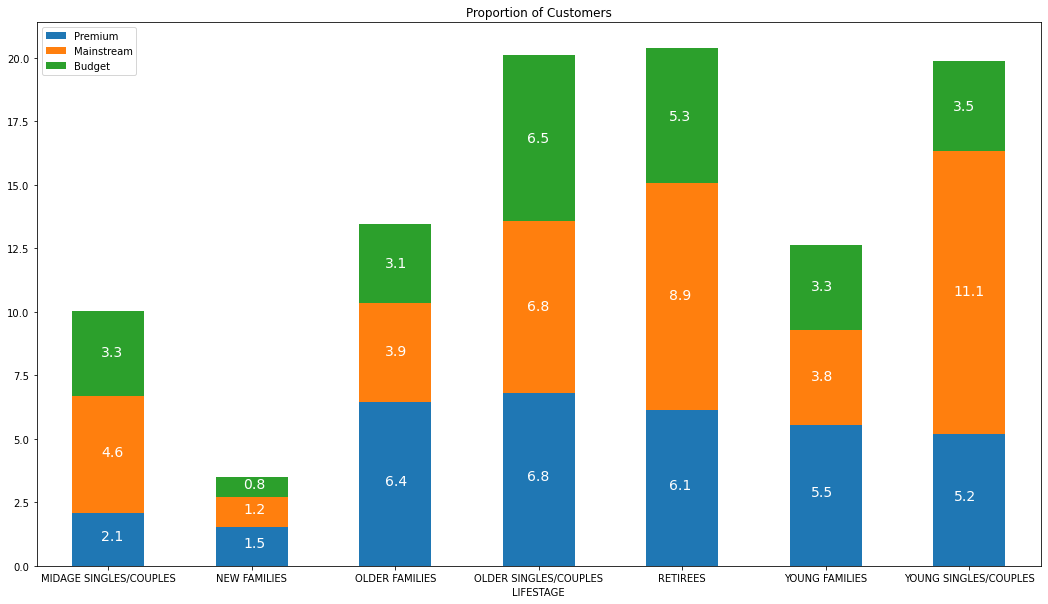

In [77]:
life = customer[['LIFESTAGE','PREMIUM_CUSTOMER','LYLTY_CARD_NBR']]
cc = life.groupby([life['LIFESTAGE'],life['PREMIUM_CUSTOMER']])['LYLTY_CARD_NBR'].count().unstack(level=1)
df_p = (cc.div(life['LYLTY_CARD_NBR'].count(),axis = 'index')*100)
def plot_stacked_bar(dataframe,title_,size_=(18,10),rot_=0,legend_="upper right"):
    ax=dataframe.plot(kind="bar",stacked=True,figsize=size_,rot=rot_,title=title_)
    annotate_stacked_bars(ax,textsize=14)
    plt.legend(customer['PREMIUM_CUSTOMER'].unique(),loc=legend_)
    plt.show()
def annotate_stacked_bars(ax,pad=0.99,colour="white",textsize=13):
    for p in ax.patches:
        value=str(round(p.get_height(),1))
        if value=="0.0":
            continue
        ax.annotate(value,((p.get_x()+p.get_width()/2)*pad-0.05,
                           (p.get_y()+p.get_height()/2)*pad),
                    color=colour,size=textsize,)
plot_stacked_bar(df_p,"Proportion of Customers",(18,10),0,"best")

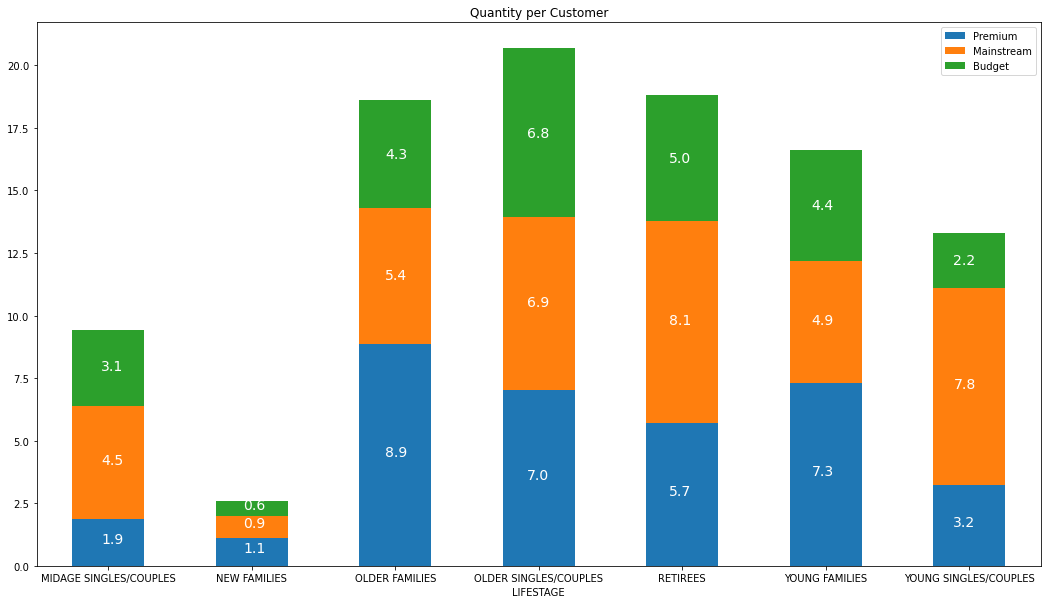

In [94]:
avg_amount=pd.DataFrame(combine.groupby([combine['LIFESTAGE'],combine['PREMIUM_CUSTOMER']])['PROD_QTY'].sum()).reset_index()
avg_amount.sort_values(by=['PROD_QTY'],ascending=False)
avg_amount_p=combine.groupby([combine['LIFESTAGE'],combine['PREMIUM_CUSTOMER']])['PROD_QTY'].sum().unstack(level=1)
df_avg_p=(avg_amount_p.div(avg_amount['PROD_QTY'].sum(),axis="index")*100)
plot_stacked_bar(df_avg_p,"Quantity per Customer",(18,10),0,"best")


From the table and graphs above we can tell that Mainstream generate the highest total sales, if we dig deeper in life stage for each premium customer type. We can see that there are more Mainstream-young singles/couples and Mainstream-retirees who buy chips, and Budget-Older families segment.

In [70]:
avg_amount=pd.DataFrame(combine.groupby([combine['LIFESTAGE'], combine['PREMIUM_CUSTOMER']])['PROD_QTY'].mean()).reset_index()
avg_amount.sort_values(by=['PROD_QTY'],ascending=False)

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY
7,OLDER FAMILIES,Mainstream,1.948625
6,OLDER FAMILIES,Budget,1.946578
15,YOUNG FAMILIES,Budget,1.943838
8,OLDER FAMILIES,Premium,1.943619
16,YOUNG FAMILIES,Mainstream,1.940977
17,YOUNG FAMILIES,Premium,1.939057
9,OLDER SINGLES/COUPLES,Budget,1.918000
11,OLDER SINGLES/COUPLES,Premium,1.913546
10,OLDER SINGLES/COUPLES,Mainstream,1.911001
1,MIDAGE SINGLES/COUPLES,Mainstream,1.910590


In [126]:
avg_spending=pd.DataFrame(combine.groupby([combine['LIFESTAGE'], combine['PREMIUM_CUSTOMER']])['TOT_SALES'].mean()).reset_index()
avg_spending['AVG_QUANTITY'] = avg_amount['PROD_QTY']
avg_spending.sort_values(by=['AVG_QUANTITY'],ascending=False).head(10)

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,AVG_QUANTITY
7,OLDER FAMILIES,Mainstream,7.461392,1.948625
6,OLDER FAMILIES,Budget,7.479436,1.946578
15,YOUNG FAMILIES,Budget,7.498086,1.943838
8,OLDER FAMILIES,Premium,7.423886,1.943619
16,YOUNG FAMILIES,Mainstream,7.395316,1.940977
17,YOUNG FAMILIES,Premium,7.472623,1.939057
9,OLDER SINGLES/COUPLES,Budget,7.657550,1.918000
11,OLDER SINGLES/COUPLES,Premium,7.678391,1.913546
10,OLDER SINGLES/COUPLES,Mainstream,7.496874,1.911001
1,MIDAGE SINGLES/COUPLES,Mainstream,7.830952,1.910590


In [127]:
avg_spending.sort_values(by=['TOT_SALES'],ascending=False).head(10)

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,AVG_QUANTITY
1,MIDAGE SINGLES/COUPLES,Mainstream,7.830952,1.910590
19,YOUNG SINGLES/COUPLES,Mainstream,7.734141,1.853536
11,OLDER SINGLES/COUPLES,Premium,7.678391,1.913546
14,RETIREES,Premium,7.674544,1.905702
9,OLDER SINGLES/COUPLES,Budget,7.657550,1.918000
12,RETIREES,Budget,7.647631,1.893044
3,NEW FAMILIES,Budget,7.538332,1.860383
4,NEW FAMILIES,Mainstream,7.530710,1.863871
15,YOUNG FAMILIES,Budget,7.498086,1.943838
10,OLDER SINGLES/COUPLES,Mainstream,7.496874,1.911001


In [120]:
two_dimension = avg_spending[(avg_spending['PREMIUM_CUSTOMER']=="Mainstream") & ((avg_spending['LIFESTAGE']=="RETIREES")|(avg_spending['LIFESTAGE']=="YOUNG SINGLES/COUPLES"))]
two_dimension

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,AVG_QUANTITY
13,RETIREES,Mainstream,7.463378,1.888738
19,YOUNG SINGLES/COUPLES,Mainstream,7.734141,1.853536


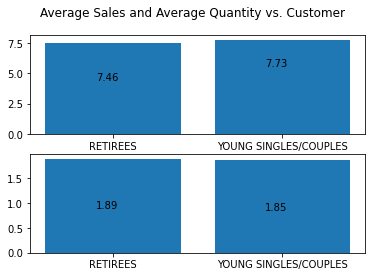

In [121]:
fig,axs = plt.subplots(2)
fig.suptitle("Average Sales and Average Quantity vs. Customer")
axs[0].bar(x=two_dimension['LIFESTAGE'],height = two_dimension['TOT_SALES'])
for index,data in enumerate(two_dimension['TOT_SALES']):
    plt.text(x=index-0.1 , y =data-4 , s=f"{data:.2f}" , fontdict=dict(fontsize=10))
axs[1].bar(x=two_dimension['LIFESTAGE'],height =two_dimension['AVG_QUANTITY'] )
for index,data in enumerate(two_dimension['AVG_QUANTITY']):
    plt.text(x=index-0.1 , y =data-1 , s=f"{data:.2f}" , fontdict=dict(fontsize=10))

From the result talbe and plots above, we know that older families and young families are willing to buy more chips, while Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. Since the difference in average spending is not that large, we can check if this difference is statistically different.

### 2.1 T-test
Perform an independent t-test between mainstream vs. premium and budget midage and young singles and couples

In [134]:
mainstream = avg_spending.query('PREMIUM_CUSTOMER=="Mainstream"')['TOT_SALES']
premium = avg_spending.query('PREMIUM_CUSTOMER=="Premium"')['TOT_SALES']
# budget = avg_spending.query('PREMIUM_CUSTOMER=="Budget"')['TOT_SALES']

avg_spending.groupby("PREMIUM_CUSTOMER")["TOT_SALES"].describe()

,count,mean,std,min,25%,50%,75%,max
PREMIUM_CUSTOMER,,,,,,,,
Budget,7.0,7.429278,0.269954,6.878943,7.392204,7.498086,7.592981,7.657550
Mainstream,7.0,7.558966,0.160601,7.395316,7.462385,7.496874,7.632426,7.830952
Premium,7.0,7.407369,0.274540,6.859795,7.371172,7.423886,7.573583,7.678391


In [138]:
from scipy import stats as st
st.ttest_ind(a = mainstream, b=premium, equal_var=True)

Ttest_indResult(statistic=1.2610291335934853, pvalue=0.23126384638752273)

Since the p-value obtained from the t-test is not significant(p>0.05), and therefore, we conclude that the mainstream and premium average spending has no difference.